# Histogram equalisation in images

## 1. Extracting a histogram from a grayscale image:
For grayscale images, various image processing algorithms use an _image histogram_. Recall that an image is a two-dimensional array of numerical intensities. An image histogram, then, is computed by counting the occurences of distinct pixel intensities over all the pixels in the image.

For this exercise, you will load an unequalized low contrast [image of Hawkes Bay, New Zealand](https://commons.wikimedia.org/wiki/File:Unequalized_Hawkes_Bay_NZ.jpg) (originally by Phillip Capper, modified by User:Konstable, via Wikimedia Commons, [CC BY 2.0](https://creativecommons.org/licenses/by/2.0/)). You will plot the image and use the pixel intensity values to plot a normalized histogram of pixel intensities.

### Instructions:
* Load data from the file `'640px-Unequalized_Hawkes_Bay_NZ.jpg'` into an array.
* Display `image` with a color map of `'gray'` in the top subplot.
* Flatten `image` into a 1-D array using the `.flatten()` method.
* Display a histogram of `pixels` in the bottom subplot.
* Use histogram options `bins=64`, `range=(0,256)`, and `normed=True` to control numerical binning and the vertical scale.
* Use plotting options `color='red'` and `alpha=0.4` to tailor the color and transparency.

In [1]:
# Import matplotlib.pyplot and numpy
import matplotlib.pyplot as plt
import numpy as np
% matplotlib inline
# Switch to seaborn style
plt.style.use('seaborn')

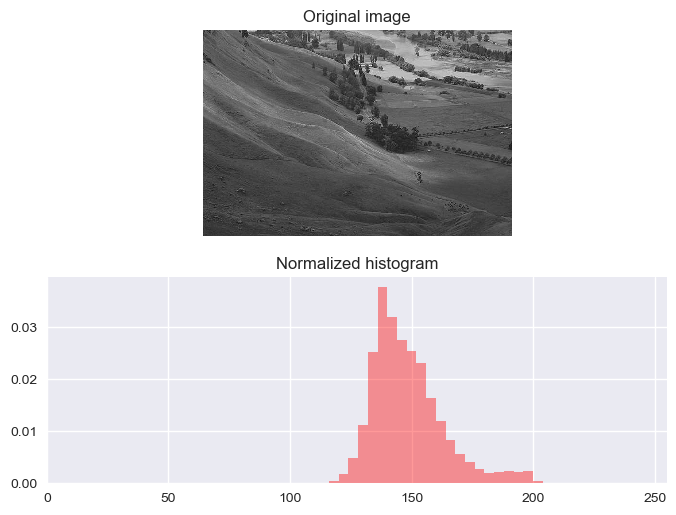

In [2]:
# Load the image into an array: image
# file_path = '12_Introduction_to_Data_Visualisation/_datasets/' # for IntelliJ
file_path = '../_datasets/'   # alternative 
image = plt.imread(file_path+'640px-Unequalized_Hawkes_Bay_NZ.jpg')

# Specify figure size
plt.figure(figsize=(8,6), dpi=100)

# Display image in top subplot using color map 'gray'
plt.subplot(2,1,1)
plt.title('Original image')
plt.axis('off')
plt.imshow(image, cmap='gray')

# Flatten the image into 1 dimension: pixels
pixels = image.flatten()

# Display a histogram of the pixels in the bottom subplot
plt.subplot(2,1,2)
plt.xlim((0,255))
plt.title('Normalized histogram')
plt.hist(pixels, bins=64, range=(0, 256), density=True, color='red', alpha=0.4)

# Display the plot
plt.show()

Image histograms are an important component of many image processing algorithms.

## 2. Cumulative Distribution Function from an image histogram:
A histogram of a continuous random variable is sometimes called a _Probability Distribution Function_ (or _PDF_). The area under a PDF (a definite integral) is called a _Cumulative Distribution Function_ (or _CDF_). The CDF quantifies the probability of observing certain pixel intensities.

Your task here is to plot the PDF and CDF of pixel intensities from a grayscale image. You will use the [grayscale image of Hawkes Bay, New Zealand](https://commons.wikimedia.org/wiki/File:Unequalized_Hawkes_Bay_NZ.jpg) (originally by Phillip Capper, modified by User:Konstable, via Wikimedia Commons, [CC BY 2.0](https://creativecommons.org/licenses/by/2.0/)). This time, the 2D array `image` will be pre-loaded and pre-flattened into the 1D array `pixels` for you.

* The histogram option `cumulative=True` permits viewing the CDF instead of the PDF.
* Notice that `plt.grid('off')` switches off distracting grid lines.
* The command `plt.twinx()` allows two plots to be overlayed sharing the x-axis but with different scales on the y-axis.

### Instructions:
* First, `use plt.hist()` to plot the histogram of the 1-D array `pixels` in the bottom subplot.
* Use the histogram options `bins=64`, `range=(0,256)`, and `normed=False`.
* Use the plotting options `alpha=0.4` and `color='red'` to make the overlayed plots easier to see.
* Second, use `plt.twinx()` to overlay plots with different vertical scales on a common horizontal axis.
* Third, call `plt.hist()` again to overlay the CDF in the bottom subplot.
* Use the histogram options `bins=64`, `range=(0,256)`, and `normed=True`.
* This time, also use `cumulative=True` to compute and display the CDF.
* Also, use `alpha=0.4` and `color='blue'` to make the overlayed plots easier to see.

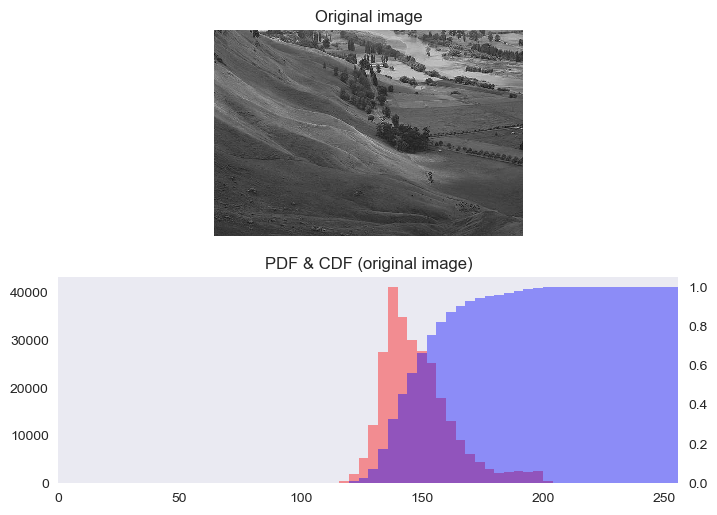

In [3]:
# Specify figure size
plt.figure(figsize=(8,6), dpi=100)

# Load the image into an array: image
image = plt.imread(file_path+'640px-Unequalized_Hawkes_Bay_NZ.jpg')

# Display image in top subplot using color map 'gray'
plt.subplot(2,1,1)
plt.imshow(image, cmap='gray')
plt.title('Original image')
plt.axis('off')

# Flatten the image into 1 dimension: pixels
pixels = image.flatten()

# Display a histogram of the pixels in the bottom subplot
plt.subplot(2,1,2)
pdf = plt.hist(pixels, bins=64, range=(0,256), density=False,
               color='red', alpha=0.4)
plt.grid(False)

# Use plt.twinx() to overlay the CDF in the bottom subplot
plt.twinx()

# Display a cumulative histogram of the pixels
cdf = plt.hist(pixels, bins=64, range=(0,256),
               density=True, cumulative=True,
               color='blue', alpha=0.4)

# Specify x-axis range, hide axes, add title and display plot
plt.xlim((0,256))
plt.grid(False)
plt.title('PDF & CDF (original image)')
plt.show()

Notice that the histogram is not well centered over the range of possible pixel intensies. The CDF rises sharply near the middle (that relates to the overall grayness of the image).

## 3. Equalizing an image histogram:
_[Histogram equalization](https://en.wikipedia.org/wiki/Histogram_equalization)_ is an image processing procedure that reassigns image pixel intensities. The basic idea is to use interpolation to map the original CDF of pixel intensities to a CDF that is almost a straight line. In essence, the pixel intensities are spread out and this has the practical effect of making a sharper, contrast-enhanced image. This is particularly useful in astronomy and medical imaging to help us see more features.

For this exercise, you will again work with the [grayscale image of Hawkes Bay, New Zealand](https://commons.wikimedia.org/wiki/File:Unequalized_Hawkes_Bay_NZ.jpg) (originally by Phillip Capper, modified by User:Konstable, via Wikimedia Commons, [CC BY 2.0](https://creativecommons.org/licenses/by/2.0/)). Notice the sample code produces the same plot as the previous exercise. Your task is to modify the code from the previous exercise to plot the new equalized image as well as its PDF and CDF.

* The arrays `image` and `pixels` are extracted for you in advance.
* The CDF of the original image is computed using `plt.hist()`.
* Notice an array `new_pixels` is created for you that interpolates new pixel values using the original image CDF.

### Instructions:
* Use the NumPy array method `.reshape()` to create a 2-D array `new_image` from the 1-D array `new_pixels`. The resulting `new_image` should have the same shape as `image.shape`.
* Display `new_image` with a `'gray'` color map to display the sharper, equalized image.
* Plot the PDF of `new_pixels` in `'red'`.
* Use `plt.twinx()` to overlay plots with different vertical scales on a common horizontal axis.
* Plot the CDF of `new_pixels` in `'blue'`.

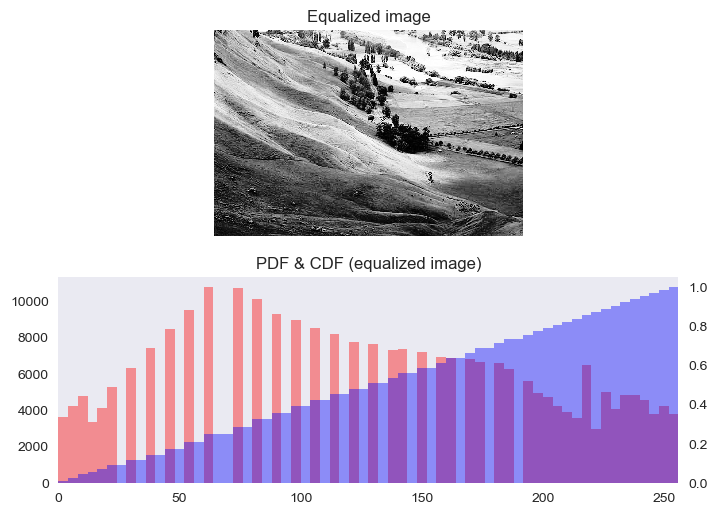

In [5]:
# Specify figure size
plt.figure(figsize=(8,6), dpi=100)

# Load the image into an array: image
image = plt.imread(file_path+'640px-Unequalized_Hawkes_Bay_NZ.jpg')

# Flatten the image into 1 dimension: pixels
pixels = image.flatten()

# Generate a cumulative histogram
cdf, bins, patches = plt.hist(pixels, bins=256, range=(0,256), density=True, cumulative=True)
new_pixels = np.interp(pixels, bins[:-1], cdf*255)

# Reshape new_pixels as a 2-D array: new_image
new_image = new_pixels.reshape(image.shape)

# Display the new image with 'gray' color map
plt.subplot(2,1,1)
plt.title('Equalized image')
plt.axis('off')
plt.imshow(new_image, cmap='gray')

# Generate a histogram of the new pixels
plt.subplot(2,1,2)
pdf = plt.hist(new_pixels, bins=64, range=(0,256), density=False,
               color='red', alpha=0.4)
plt.grid(False)

# Use plt.twinx() to overlay the CDF in the bottom subplot
plt.twinx()
plt.xlim((0,256))
plt.grid(False)

# Add title
plt.title('PDF & CDF (equalized image)')

# Generate a cumulative histogram of the new pixels
cdf = plt.hist(new_pixels, bins=64, range=(0,256),
               cumulative=True, density=True,
               color='blue', alpha=0.4)
plt.show()


Histogram equalization can help make an image sharper.

## 4. Extracting histograms from a color image:
This exercise resembles the last in that you will plot histograms from an image. This time, you will use [a color image of the Helix Nebula as seen by the Hubble and the Cerro Toledo Inter-American Observatory](http://imgsrc.hubblesite.org/hu/db/images/hs-2004-32-b-small_web.jpg). The separate RGB (red-green-blue) channels will be extracted for you as two-dimensional arrays `red`, `green`, and `blue` respectively. You will plot three overlaid color histograms on common axes (one for each channel) in a subplot as well as the original image in a separate subplot.

### Instructions:
* Display `image` in the top subplot of a $2×1$ subplot grid. Don't use a colormap here.
* Flatten the 2-D arrays `red`, `green`, and `blue` into 1-D arrays.
* Display three histograms in the bottom subplot: one for `red_pixels`, one for `green_pixels`, and one for `blue_pixels`. For each, use 64 bins and specify a translucency of `alpha=0.2`.

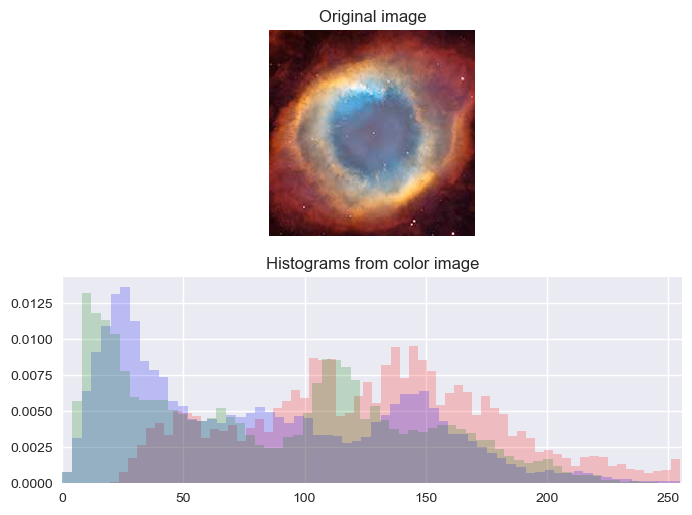

In [6]:
# Specify figure size
plt.figure(figsize=(8,6), dpi=100)

# Load the image into an array: image
image = plt.imread(file_path+'hs-2004-32-b-small_web.jpg')

# Display image in top subplot
plt.subplot(2,1,1)
plt.title('Original image')
plt.axis('off')
plt.imshow(image)

# Extract 2-D arrays of the RGB channels: red, blue, green
red, green, blue = image[:,:,0], image[:,:,1], image[:,:,2]

# Flatten the 2-D arrays of the RGB channels into 1-D
red_pixels = red.flatten()
blue_pixels = blue.flatten()
green_pixels = green.flatten()

# Overlay histograms of the pixels of each color in the bottom subplot
plt.subplot(2,1,2)
plt.title('Histograms from color image')
plt.xlim((0,256))
plt.hist(red_pixels, bins=64, density=True, color='red', alpha=0.2)
plt.hist(blue_pixels, bins=64, density=True, color='blue', alpha=0.2)
plt.hist(green_pixels, bins=64, density=True, color='green', alpha=0.2)

# Display the plot
plt.show()


Notice how the histogram generated from this color image differs from the histogram you generated earlier from a grayscale image.

## 5. Extracting bivariate histograms from a color image:
Rather than overlaying univariate histograms of intensities in distinct channels, it is also possible to view the joint variation of pixel intensity in two different channels.

For this final exercise, you will use the same [color image of the Helix Nebula as seen by the Hubble and the Cerro Toledo Inter-American Observatory](http://imgsrc.hubblesite.org/hu/db/images/hs-2004-32-b-small_web.jpg). The separate RGB (red-green-blue) channels will be extracted for you as one-dimensional arrays `red_pixels`, `green_pixels`, & `blue_pixels` respectively.

### Instructions:
* Make a 2-D histogram in the top left subplot showing the joint variation of `red_pixels` (on the x-axis) and `green_pixels` (on the y-axis). Use `bins=(32,32)` to control binning.
* Make a 2-D histogram in the top right subplot showing the joint variation of `green_pixels` (on the x-axis) and `blue_pixels` (on the y-axis). Use `bins=(32,32)` to control binning.
* Make a 2-D histogram in the bottom left subplot showing the joint variation of `blue_pixels` (on the x-axis) and `red_pixels` (on the y-axis). Use `bins=(32,32)` to control binning.

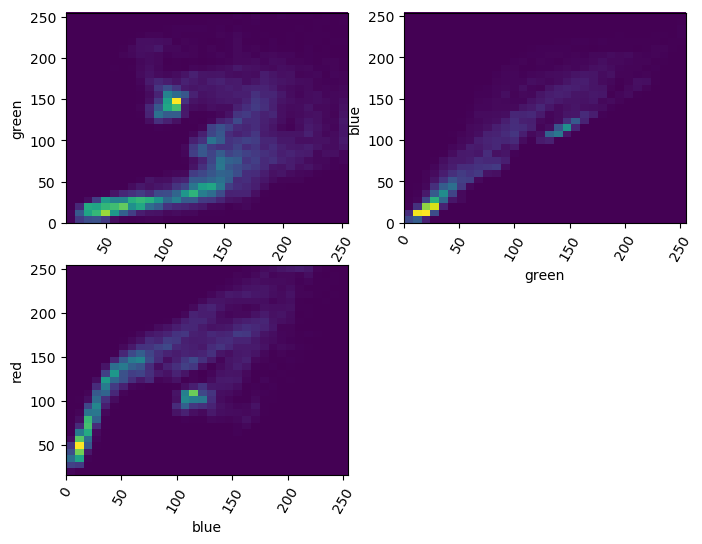

In [7]:
# Switch to default style
plt.style.use('default')
# Specify figure size
plt.figure(figsize=(8,6), dpi=100)

# Load the image into an array: image
image = plt.imread(file_path+'hs-2004-32-b-small_web.jpg')

# Extract RGB channels and flatten into 1-D array
red, blue, green = image[:,:,0], image[:,:,1], image[:,:,2]
red_pixels = red.flatten()
blue_pixels = blue.flatten()
green_pixels = green.flatten()

# Generate a 2-D histogram of the red and green pixels
plt.subplot(2,2,1)
plt.grid(False)
plt.xticks(rotation=60)
plt.xlabel('red')
plt.ylabel('green')
plt.hist2d(red_pixels, green_pixels, bins=(32,32))

# Generate a 2-D histogram of the green and blue pixels
plt.subplot(2,2,2)
plt.grid(False)
plt.xticks(rotation=60)
plt.xlabel('green')
plt.ylabel('blue')
plt.hist2d(green_pixels, blue_pixels, bins=(32,32))

# Generate a 2-D histogram of the blue and red pixels
plt.subplot(2,2,3)
plt.grid(False)
plt.xticks(rotation=60)
plt.xlabel('blue')
plt.ylabel('red')
plt.hist2d(blue_pixels, red_pixels, bins=(32,32))

# Display the plot
plt.show()